<a href="https://colab.research.google.com/github/nazalnihad/CV_LAB/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keypoints in Image1: 5887
Keypoints in Image2: 5847
Good Matches after ratio test: 5631


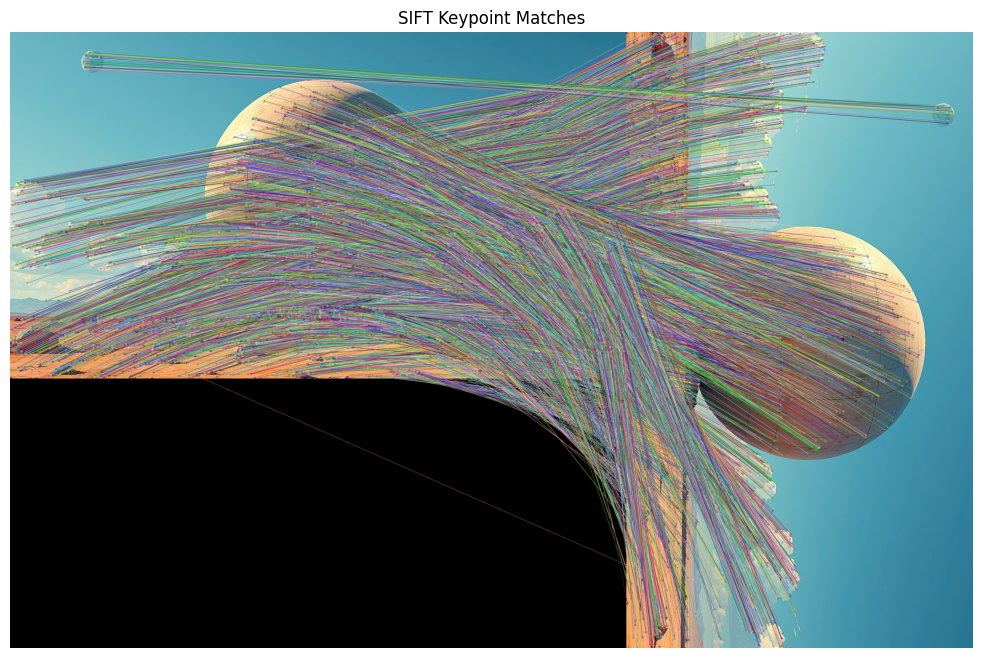

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/bullet-space.jpg')  # query image
img2 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE) # train image

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print(f"Keypoints in Image1: {len(kp1)}")
print(f"Keypoints in Image2: {len(kp2)}")

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Good Matches after ratio test: {len(good_matches)}")

matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoint Matches")
plt.axis('off')
plt.show()

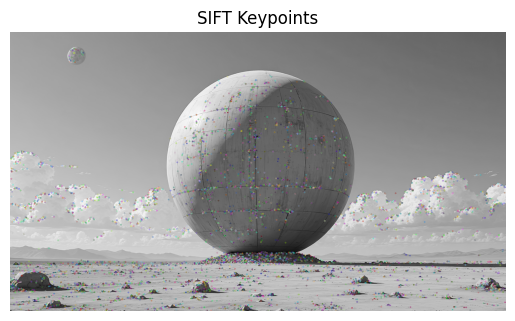

In [2]:
kp_img = cv2.drawKeypoints(gray1, kp1, None)
plt.imshow(kp_img, cmap='gray')
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()